In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
df=pd.read_csv("df_EDA.csv")

| العمود             | الوصف                                  | النوع          | نستخدمه في الموديل؟             |
| ------------------ | -------------------------------------- | -------------- | ------------------------------- |
| **Unnamed: 0**     | رقم تسلسلي (Index محفوظ)               | عددي           | ❌ لا (يتحذف)                    |
| **Quarter**        | ربع السنة (1–4)                        | عددي (Ordinal) | ✅ ممكن                          |
| **Month**          | رقم الشهر (1–12)                       | عددي (Ordinal) | ✅ نعم                           |
| **DayofMonth**     | يوم في الشهر (1–31)                    | عددي           | ✅ ممكن                          |
| **DayOfWeek**      | رقم اليوم في الأسبوع (1–7)             | عددي (Ordinal) | ✅ نعم                           |
| **FlightDate**     | تاريخ الرحلة                           | تاريخ          | ⚠️ يستخرج منه Features أو يتحذف |
| **Airlines**       | اسم شركة الطيران                       | نص (Nominal)   | ✅ بعد Encoding                  |
| **OriginCityName** | مدينة الإقلاع                          | نص (Nominal)   | ✅ بعد Encoding                  |
| **DestCityName**   | مدينة الوصول                           | نص (Nominal)   | ✅ بعد Encoding                  |
| **DepDelay**       | تأخير الإقلاع بالدقائق                 | عددي           | ✅ مهم جدًا                      |
| **ArrDelay**       | تأخير الوصول بالدقائق                  | عددي           | ⚠️ حسب الهدف (ممكن Leakage)     |
| **AirTime**        | مدة الطيران بالدقائق                   | عددي           | ✅ نعم                           |
| **Distance**       | المسافة بين المدينتين                  | عددي           | ✅ نعم                           |
| **Month_Str**      | اسم الشهر (Jan, Feb...)                | نص             | ❌ مكرر (يتحذف)                  |
| **DayOfWeek_Str**  | اسم اليوم (Mon, Tue...)                | نص             | ❌ مكرر (يتحذف)                  |
| **Flight_Status**  | حالة الرحلة (0 = On-time, 1 = Delayed) | Target         | 🎯 الهدف                        |


In [106]:
df.head()

,Unnamed: 0,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Airlines,OriginCityName,DestCityName,DepDelay,ArrDelay,AirTime,Distance,Month_Str,DayOfWeek_Str,Flight_Status
0,1,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Fort Lauderdale, FL",-4.0,-1.0,93.0,581.0,Jan,Thu,0
1,2,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Atlanta, GA",-2.0,-12.0,83.0,581.0,Jan,Thu,0
2,3,1,1,6,4,2022-01-06,Delta Airlines,"Fort Lauderdale, FL","Raleigh/Durham, NC",-5.0,-15.0,93.0,680.0,Jan,Thu,0
3,4,1,1,6,4,2022-01-06,Delta Airlines,"Atlanta, GA","Jackson/Vicksburg, MS",-4.0,-11.0,60.0,341.0,Jan,Thu,0
4,5,1,1,6,4,2022-01-06,Delta Airlines,"Jackson/Vicksburg, MS","Atlanta, GA",-7.0,-23.0,49.0,341.0,Jan,Thu,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804006 entries, 0 to 6804005
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   Quarter         int64  
 2   Month           int64  
 3   DayofMonth      int64  
 4   DayOfWeek       int64  
 5   FlightDate      object 
 6   Airlines        object 
 7   OriginCityName  object 
 8   DestCityName    object 
 9   DepDelay        float64
 10  ArrDelay        float64
 11  AirTime         float64
 12  Distance        float64
 13  Month_Str       object 
 14  DayOfWeek_Str   object 
 15  Flight_Status   int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 830.6+ MB


In [108]:
df["Flight_Status"].value_counts(normalize=True) #unbalanced


Flight_Status
0    0.797357
1    0.202643
Name: proportion, dtype: float64

In [109]:

# sample من كلاس 0
sample_0 = df[df['Flight_Status'] == 0].sample(n=50000, random_state=42)

# sample من كلاس 1
sample_1 = df[df['Flight_Status'] == 1].sample(n=50000, random_state=42)

# concat
df_sample = pd.concat([sample_0, sample_1], axis=0)

# shuffle عشان مايبقوش مترتبين
df_sample = df_sample.sample(frac=1, random_state=42).reset_index(drop=True)



In [110]:
df_sample.columns

Index(['Unnamed: 0', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Airlines', 'OriginCityName', 'DestCityName', 'DepDelay',
       'ArrDelay', 'AirTime', 'Distance', 'Month_Str', 'DayOfWeek_Str',
       'Flight_Status'],
      dtype='object')

In [111]:
df_sample.drop(["Month_Str","DayOfWeek_Str","Quarter","Unnamed: 0"],axis=1,inplace=True)

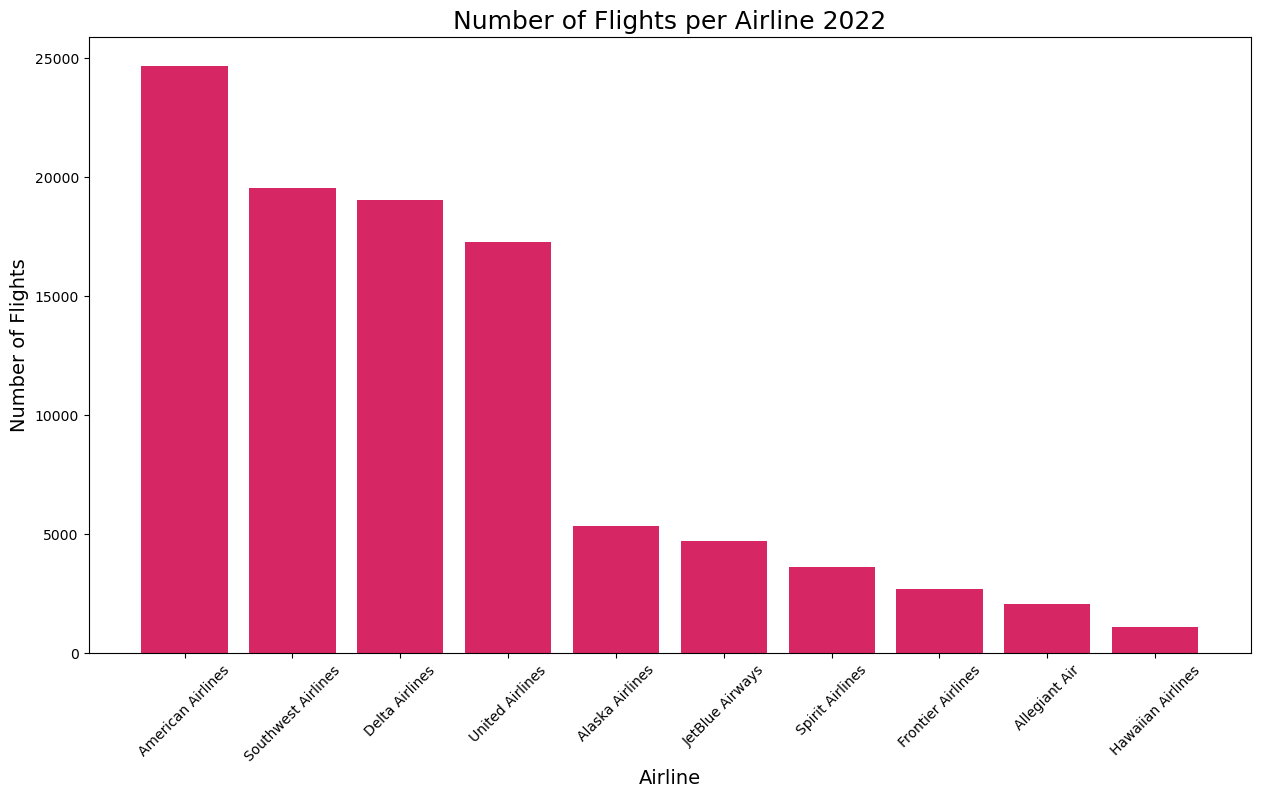

In [112]:
airline_counts = df_sample['Airlines'].value_counts()

plt.figure(figsize=(15,8))
plt.bar(airline_counts.index, airline_counts.values, color="#d62764")
plt.title("Number of Flights per Airline 2022", fontsize=18)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Number of Flights", fontsize=14)
plt.xticks(rotation=45)  
plt.show()

<Axes: xlabel='Distance', ylabel='AirTime'>

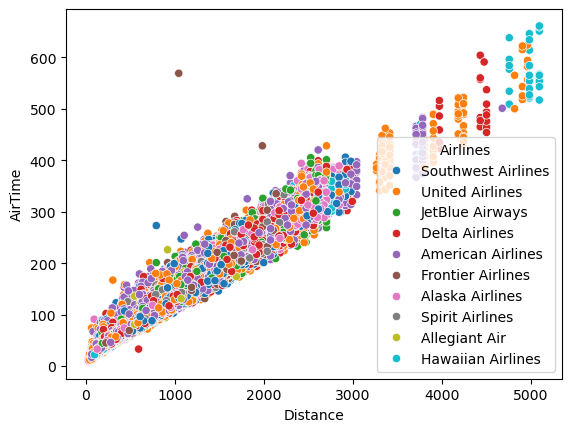

In [113]:
plt.Figure(figsize=(40,30))
sns.scatterplot(x='Distance', y='AirTime', hue='Airlines', data=df_sample)


C:\Users\rosea\AppData\Local\Temp\ipykernel_15316\677363241.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ArrDelay', y='Route', data=top10_routes, palette=pink_colors)


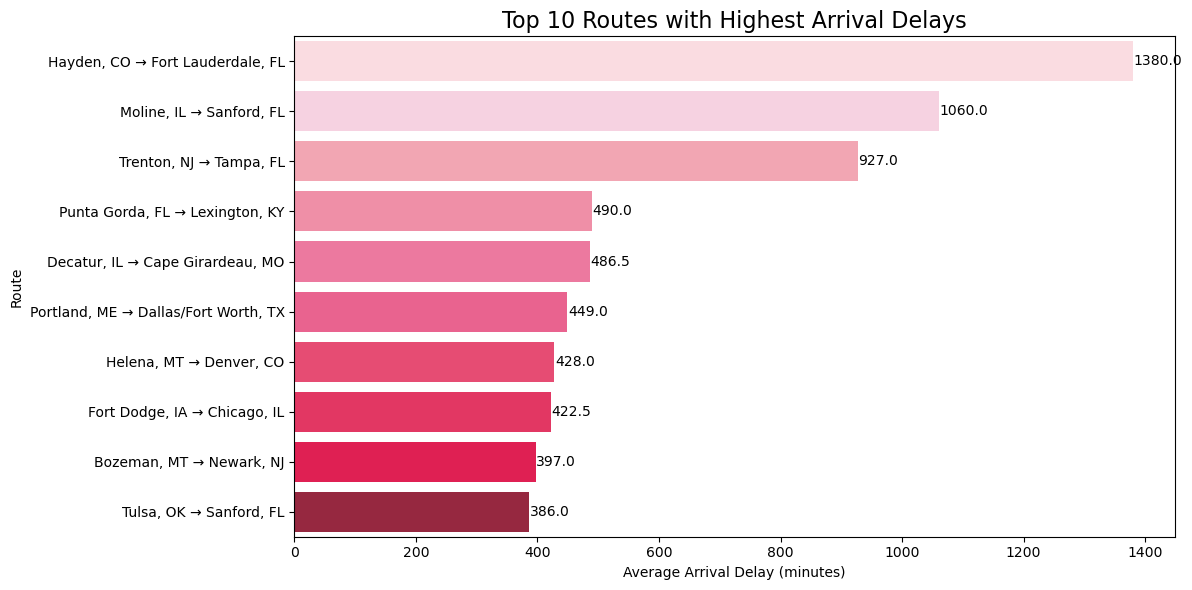

In [ ]:

df_plot = df_sample.copy()
df_plot['Route'] = df_plot['OriginCityName'] + " → " + df_plot['DestCityName']
pink_colors = ["#FFD7DE", "#FCCCE0", "#FF99AA", "#FF7F9F", "#FF6699",
               "#FF4D88", "#FF3366", "#FF1A55", "#FF0044", "#A81636"]


route_delay = df_plot.groupby('Route')['ArrDelay'].mean().sort_values(ascending=False)
top10_routes = route_delay.head(10).reset_index()


plt.figure(figsize=(12,6))
ax = sns.barplot(x='ArrDelay', y='Route', data=top10_routes, palette=pink_colors)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height()/2, f'{width:.1f}', ha='left', va='center', fontsize=10)
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Route")
plt.title("Top 10 Routes with Highest Arrival Delays", fontsize=16)
plt.tight_layout()
plt.show()


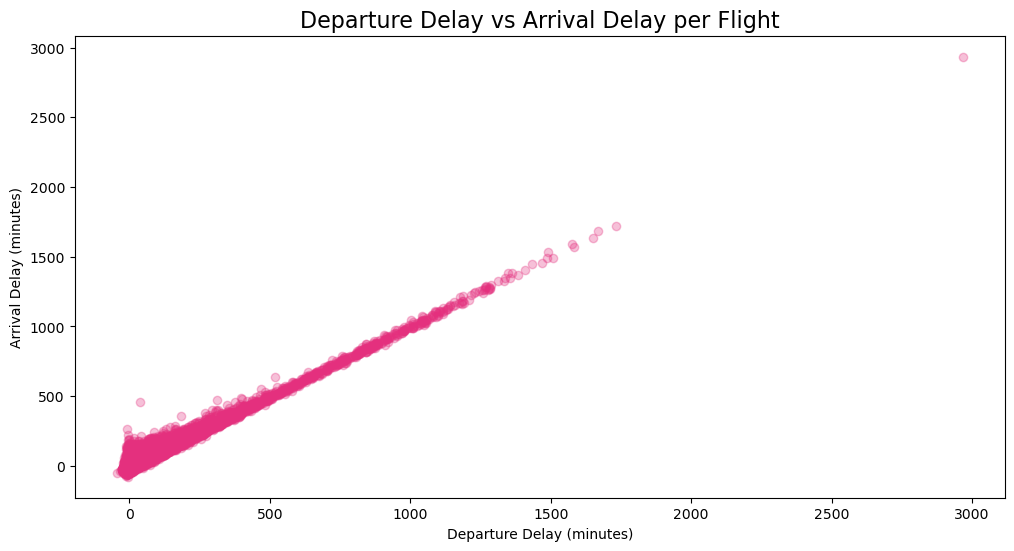

In [115]:
#هل الرحلات اللي اتأخرت في الإقلاع غالبًا هتوصل متأخرة ولا فيه رحلات “catch up”
plt.figure(figsize=(12,6))
plt.scatter(df_sample['DepDelay'], df_sample['ArrDelay'], alpha=0.3, color="#e4307e")
plt.title("Departure Delay vs Arrival Delay per Flight", fontsize=16)
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


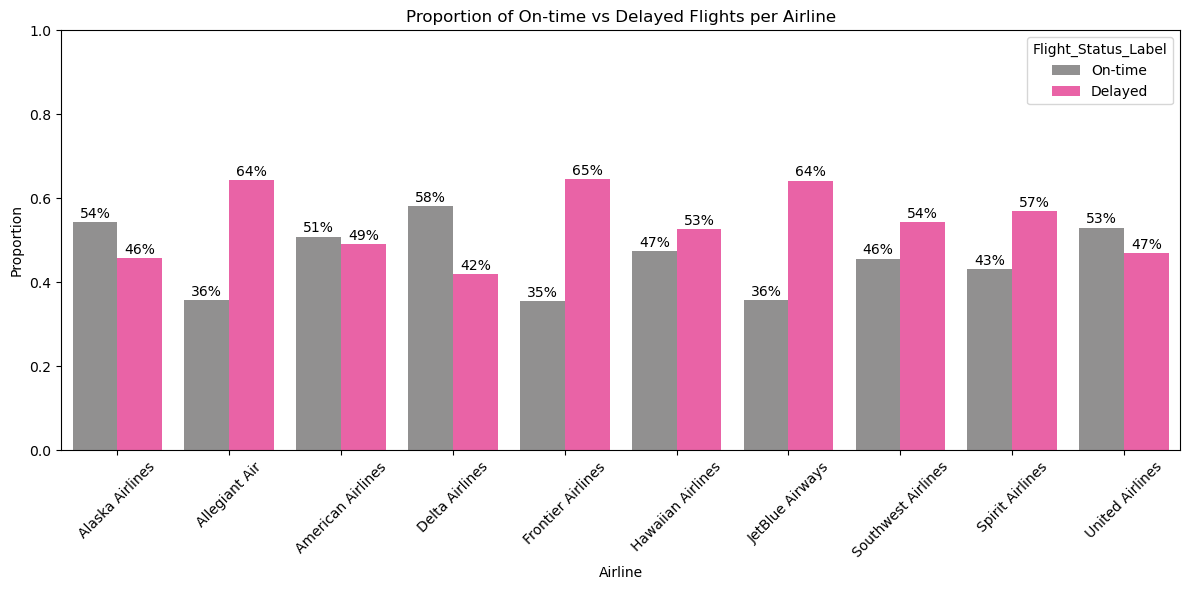

In [ ]:
#تحليل نسبي (Percentage Analysis) لكل شركة طيران:
#قد إيه رحلاتها On-time وقد إيه Delayed.
df_plot = df_sample.copy()

# إنشاء Flight_Status_Label مؤقت
df_plot['Flight_Status_Label'] = df_plot['Flight_Status'].map({0:'On-time', 1:'Delayed'})

# حساب النسب لكل شركة طيران
df_percent = (
    df_plot
    .groupby('Airlines')['Flight_Status_Label']
    .value_counts(normalize=True)
    .rename('percent')
    .reset_index()
)

# ألوان
palette_colors = {'On-time':"#919090", 'Delayed':"#ff4da6"}

# رسم Barplot
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x='Airlines',
    y='percent',
    hue='Flight_Status_Label',
    data=df_percent,
    palette=palette_colors
)

# إضافة النسب فوق الأعمدة
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width()/2.,
            height + 0.01,
            f'{height:.0%}',
            ha="center",
            fontsize=10
        )

plt.ylim(0,1)
plt.xticks(rotation=45)
plt.title("Proportion of On-time vs Delayed Flights per Airline")
plt.xlabel("Airline")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()


In [117]:
df_sample['FlightDate'] = pd.to_datetime(df_sample['FlightDate'], errors='coerce') 
df_sample['Year'] = df_sample['FlightDate'].dt.year

print(df_sample[['FlightDate','Year']].head())
df_sample.drop(columns=['FlightDate'],inplace=True)

  FlightDate  Year
0 2022-02-11  2022
1 2022-10-11  2022
2 2022-04-02  2022
3 2022-06-14  2022
4 2022-11-04  2022


Encoding

In [120]:
cols=["Airlines","OriginCityName","DestCityName"]
for col in cols:
    print(df_sample[col].unique())

['Southwest Airlines' 'United Airlines' 'JetBlue Airways' 'Delta Airlines'
 'American Airlines' 'Frontier Airlines' 'Alaska Airlines'
 'Spirit Airlines' 'Allegiant Air' 'Hawaiian Airlines']
['Denver, CO' 'Washington, DC' 'Chicago, IL' 'Newark, NJ' 'Boston, MA'
 'Tampa, FL' 'Minneapolis, MN' 'West Palm Beach/Palm Beach, FL'
 'Dallas/Fort Worth, TX' 'San Diego, CA' 'Atlanta, GA' 'Wichita, KS'
 'Nashville, TN' 'Milwaukee, WI' 'San Antonio, TX' 'Cleveland, OH'
 'Los Angeles, CA' 'Lafayette, LA' 'Memphis, TN' 'San Francisco, CA'
 'Killeen, TX' 'Louisville, KY' 'Buffalo, NY' 'Sioux Falls, SD'
 'Orlando, FL' 'Rochester, NY' 'Eugene, OR' 'Kansas City, MO'
 'New York, NY' 'Charlottesville, VA' 'Houston, TX' 'Austin, TX'
 'Madison, WI' 'Williston, ND' 'Newport News/Williamsburg, VA'
 'Las Vegas, NV' 'Dallas, TX' 'Salt Lake City, UT' 'Raleigh/Durham, NC'
 'Corpus Christi, TX' 'Burbank, CA' 'Philadelphia, PA' 'Phoenix, AZ'
 'Portland, OR' 'Honolulu, HI' 'Charlotte, NC' 'Knoxville, TN'
 'San Luis O

In [121]:
from sklearn.preprocessing import TargetEncoder
te=TargetEncoder()
df_sample["Airlines"]=te.fit_transform(df_sample[["Airlines"]],df_sample["Flight_Status"])
df_sample["OriginCityName"]=te.fit_transform(df_sample[["OriginCityName"]],df_sample["Flight_Status"])
df_sample["DestCityName"]=te.fit_transform(df_sample[["DestCityName"]],df_sample["Flight_Status"])


In [122]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Month           100000 non-null  int64  
 1   DayofMonth      100000 non-null  int64  
 2   DayOfWeek       100000 non-null  int64  
 3   Airlines        100000 non-null  float64
 4   OriginCityName  100000 non-null  float64
 5   DestCityName    100000 non-null  float64
 6   DepDelay        100000 non-null  float64
 7   ArrDelay        100000 non-null  float64
 8   AirTime         100000 non-null  float64
 9   Distance        100000 non-null  float64
 10  Flight_Status   100000 non-null  int64  
 11  Year            100000 non-null  int32  
dtypes: float64(7), int32(1), int64(4)
memory usage: 8.8 MB


In [ ]:
df_sample=df_sample.drop(["DepDelay"],axis=1) #data leakage

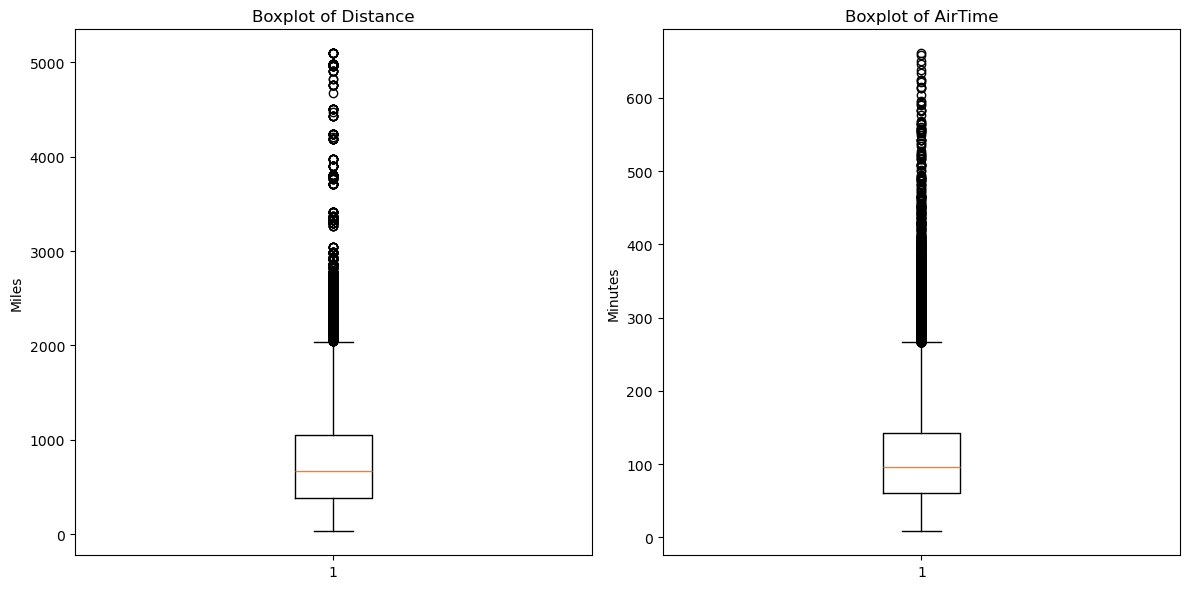

In [124]:

plt.figure(figsize=(12, 6))

# الرسم الأول: المسافة
plt.subplot(1, 2, 1) 
plt.boxplot(df_sample["Distance"])
plt.title("Boxplot of Distance")
plt.ylabel("Miles")

plt.subplot(1, 2, 2)
plt.boxplot(df_sample["AirTime"])
plt.title("Boxplot of AirTime")
plt.ylabel("Minutes")

plt.tight_layout() 
plt.show()

split

In [125]:
x=df_sample.drop(["Flight_Status"],axis=1)
y=df_sample["Flight_Status"]

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaling

In [127]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
df_sample["Distance"]=pt.fit_transform(df_sample[["Distance"]])
df_sample["AirTime"]=pt.fit_transform(df_sample[["AirTime"]])


In [128]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Month           100000 non-null  int64  
 1   DayofMonth      100000 non-null  int64  
 2   DayOfWeek       100000 non-null  int64  
 3   Airlines        100000 non-null  float64
 4   OriginCityName  100000 non-null  float64
 5   DestCityName    100000 non-null  float64
 6   ArrDelay        100000 non-null  float64
 7   AirTime         100000 non-null  float64
 8   Distance        100000 non-null  float64
 9   Flight_Status   100000 non-null  int64  
 10  Year            100000 non-null  int32  
dtypes: float64(6), int32(1), int64(4)
memory usage: 8.0 MB


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression,SGDClassifier
# from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.experimental import enable_hist_gradient_boosting #for Histgrad
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.ensemble import  StackingClassifier
estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100))
]
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import  accuracy_score,precision_score,recall_score,f1_score,balanced_accuracy_score#confusion_matrix,classification_report,RocCurveDisplay,roc_auc_score

In [130]:

models = {
    "lg": LogisticRegression(class_weight='balanced', C=0.01, solver='lbfgs'),
    "naive": GaussianNB(),
    "KNN": KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance'),
    "DTree": DecisionTreeClassifier(max_depth=None, min_samples_split=2),
    "Random forest": RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=50),
    "Extra": ExtraTreesClassifier(max_depth=None, min_samples_split=2, n_estimators=200),
    "bagging": BaggingClassifier(n_estimators=10),
    "Adaboost": AdaBoostClassifier(learning_rate=0.01, n_estimators=50),
    "Gboost": GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=50),
    "HGboost": HistGradientBoostingClassifier(learning_rate=0.01, max_iter=100),
    "stacking": StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()),
    "Xgboosing": XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=50),
    # "Catboosing": CatBoostClassifier(verbose=0),
    "LGBM": LGBMClassifier(learning_rate=0.01, n_estimators=50, num_leaves=31)
}

metrics={
    "acc":accuracy_score,
    "precision":precision_score,
    "recall":recall_score,
    "balance_acc":balanced_accuracy_score,
    "f1_score":f1_score
    
}
# param_grids = {
#     "lg": {'C':[0.01,0.1,1,10], 'solver':['lbfgs','liblinear']},
#     "naive": {},
#     "KNN": {'n_neighbors':[3,5,7], 'weights':['uniform','distance'], 'metric':['euclidean','manhattan']},
#     "DTree": {'max_depth':[None,5,10], 'min_samples_split':[2,5,10]},
#     "Random forest": {'n_estimators':[50,100,200], 'max_depth':[None,5,10], 'min_samples_split':[2,5,10]},
#     "Extra": {'n_estimators':[50,100,200], 'max_depth':[None,5,10], 'min_samples_split':[2,5,10]},
#     "bagging": {'n_estimators':[10,50,100]},
#     "Adaboost": {'n_estimators':[50,100,200], 'learning_rate':[0.01,0.1,1]},
#     "Gboost": {'n_estimators':[50,100,200], 'learning_rate':[0.01,0.1,0.5], 'max_depth':[3,5]},
#     "HGboost": {'max_iter':[100,200], 'learning_rate':[0.01,0.1]},
#     "stacking":{
#     'final_estimator__C':[0.1, 1, 10]
#     },
#     "Xgboosing": {'n_estimators':[50,100,200], 'learning_rate':[0.01,0.1,0.5], 'max_depth':[3,5]},
#     # "Catboosing": {},
#     "LGBM": {'n_estimators':[50,100,200], 'learning_rate':[0.01,0.1], 'num_leaves':[31,50]}
# }

In [131]:

results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)

    row = {"model_name": model_name}

    for metric_name, metric in metrics.items():
        row[f"{metric_name}_test"] = metric(y_test, y_pred_test)

    results.append(row)

results_df = pd.DataFrame(results)
results_df

[LightGBM] [Info] Number of positive: 39922, number of negative: 40078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499025 -> initscore=-0.003900
[LightGBM] [Info] Start training from score -0.003900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

,model_name,acc_test,precision_test,recall_test,balance_acc_test,f1_score_test
0,lg,1.00000,1.000000,1.000000,1.000000,1.000000
1,naive,0.97615,0.977045,0.975590,0.976154,0.976317
2,KNN,0.98795,0.980651,0.995733,0.987889,0.988135
3,DTree,1.00000,1.000000,1.000000,1.000000,1.000000
4,Random forest,1.00000,1.000000,1.000000,1.000000,1.000000
5,Extra,0.99470,0.990265,0.999305,0.994664,0.994765
6,bagging,1.00000,1.000000,1.000000,1.000000,1.000000
7,Adaboost,1.00000,1.000000,1.000000,1.000000,1.000000
8,Gboost,1.00000,1.000000,1.000000,1.000000,1.000000
9,HGboost,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Build model
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary Classification

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

# Evaluate
loss, accuracy = model.evaluate(x_test, y_test)

print("Loss     :", loss)
print("Accuracy :", accuracy)


In [ ]:
# pd.DataFrame(history.history).plot(figsize=(12, 8))
# plt.grid(True)
# plt.gca().set_ylim(0, 1)
# plt.show()


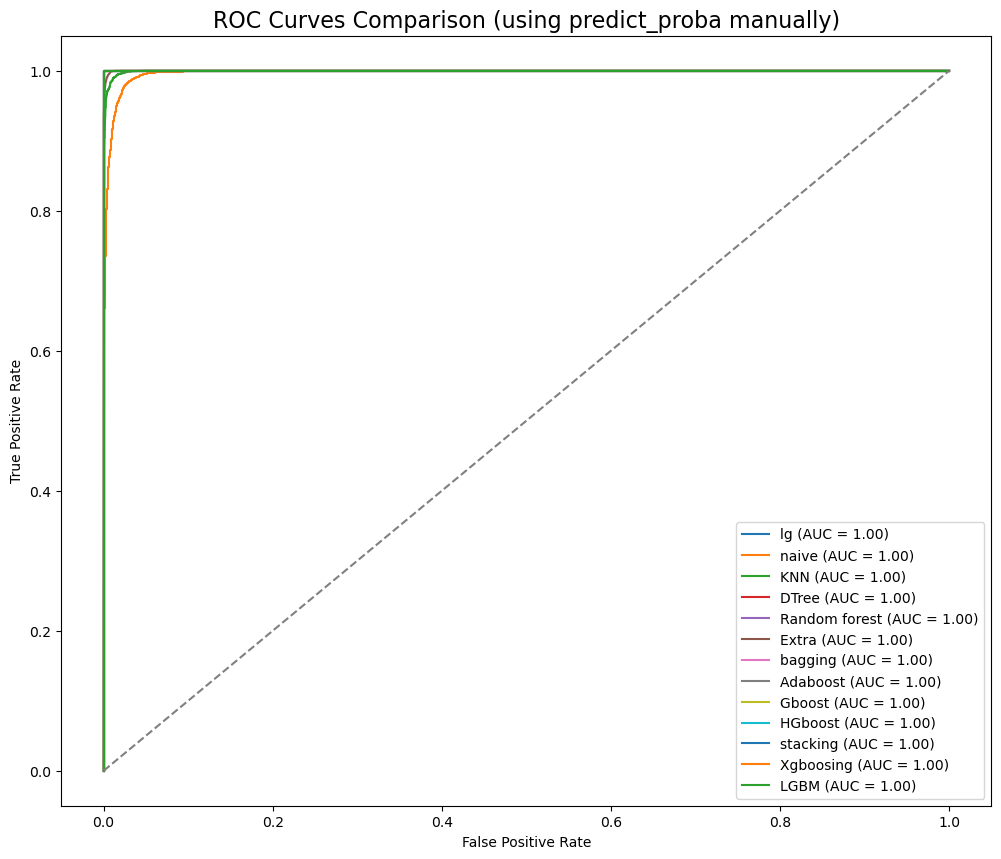

In [132]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(12, 10))

for name, model in models.items():
    # تحقق إذا الموديل بيدعم predict_proba
    if hasattr(model, "predict_proba"):
        # توقع الاحتمالات للفئة الإيجابية
        y_pred_prob = model.predict_proba(x_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

        auc = roc_auc_score(y_test, y_pred_prob)

     
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    else:
        print(f"{name} does not support predict_proba and is skipped.")

plt.plot([0, 1], [0, 1], "--", color="gray")

plt.title("ROC Curves Comparison (using predict_proba manually)", fontsize=16)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [133]:
from sklearn.metrics import classification_report
for name, model in models.items():
    y_pred=model.predict(x_test)
    print(f'--------------------------{name}---------------------')
    print(classification_report(y_test,y_pred,zero_division=0))

--------------------------lg---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9922
           1       1.00      1.00      1.00     10078

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

--------------------------naive---------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9922
           1       0.98      0.98      0.98     10078

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000

--------------------------KNN---------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9922
           1       0.98      1.00      0.99     10078

    accuracy                

--------------------------lg---------------------
 [[ 9922     0]
 [    0 10078]]


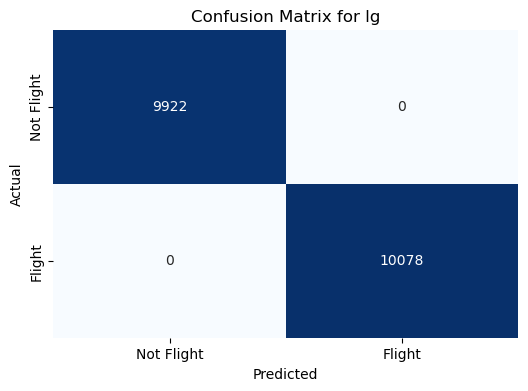

--------------------------naive---------------------
 [[9691  231]
 [ 246 9832]]


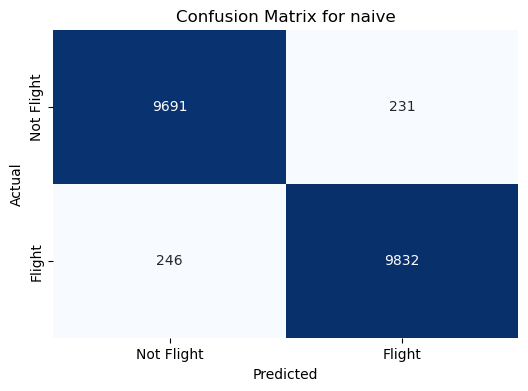

--------------------------KNN---------------------
 [[ 9724   198]
 [   43 10035]]


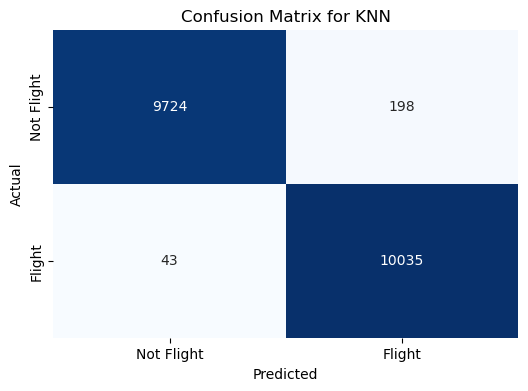

--------------------------DTree---------------------
 [[ 9922     0]
 [    0 10078]]


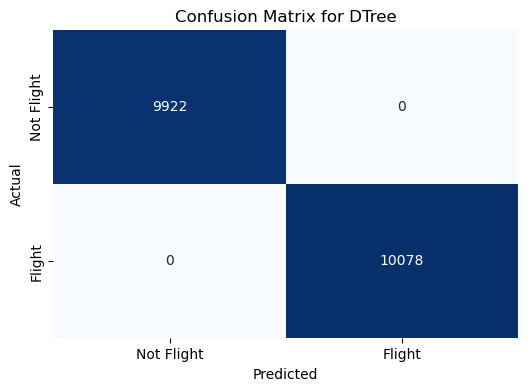

--------------------------Random forest---------------------
 [[ 9922     0]
 [    0 10078]]


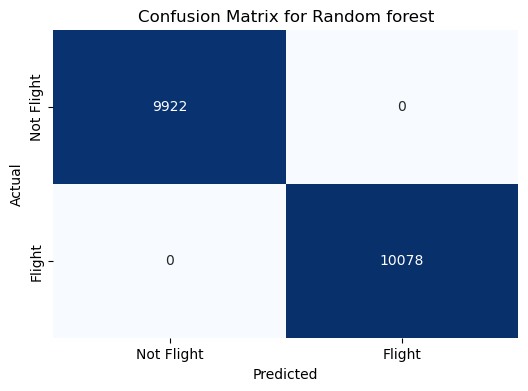

--------------------------Extra---------------------
 [[ 9823    99]
 [    7 10071]]


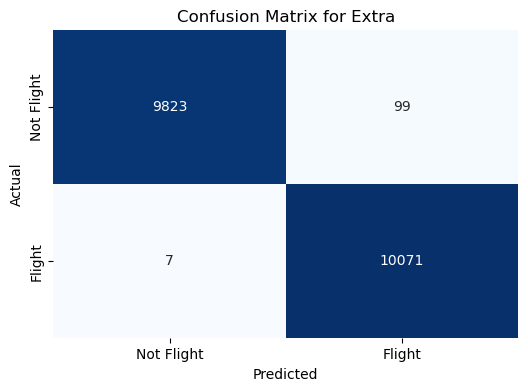

--------------------------bagging---------------------
 [[ 9922     0]
 [    0 10078]]


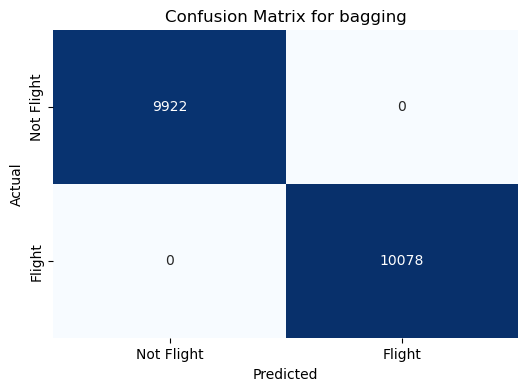

--------------------------Adaboost---------------------
 [[ 9922     0]
 [    0 10078]]


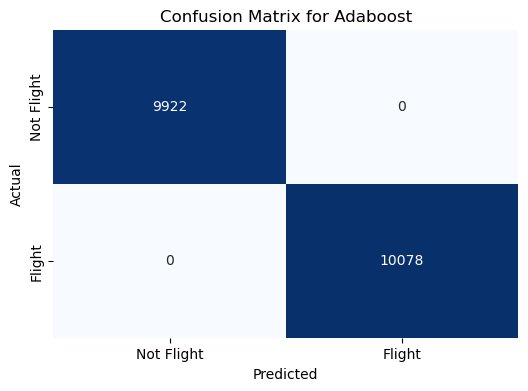

--------------------------Gboost---------------------
 [[ 9922     0]
 [    0 10078]]


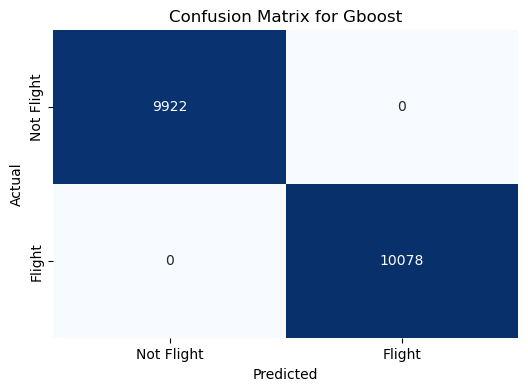

--------------------------HGboost---------------------
 [[ 9922     0]
 [    0 10078]]


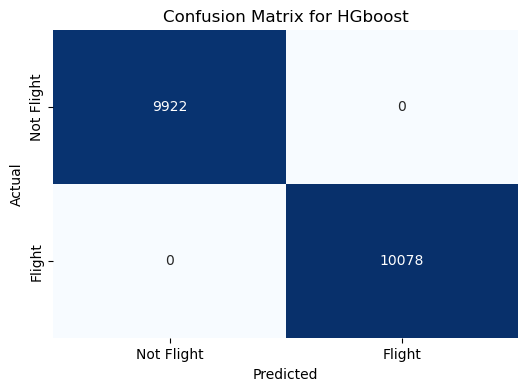

--------------------------stacking---------------------
 [[ 9922     0]
 [    0 10078]]


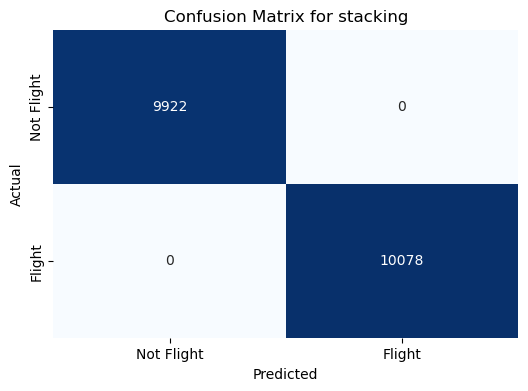

--------------------------Xgboosing---------------------
 [[ 9922     0]
 [    0 10078]]


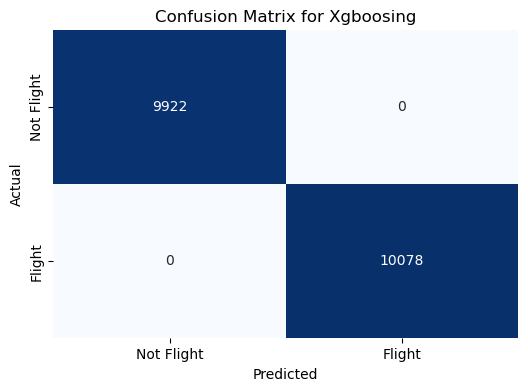

--------------------------LGBM---------------------
 [[ 9922     0]
 [    0 10078]]


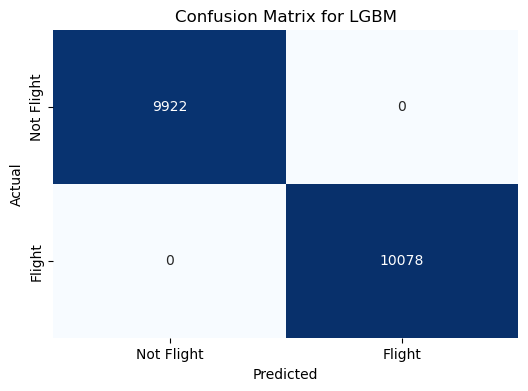

In [134]:
from sklearn.metrics import confusion_matrix
for name, model in models.items():
        y_pred = model.predict(x_test)
        
        # حساب Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        print(f"--------------------------{name}---------------------\n", cm)
        
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False,
                    xticklabels=['Not Flight', 'Flight'],
                    yticklabels=['Not Flight', 'Flight'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title(f'Confusion Matrix for {name}')
        plt.show()    